## Variables aleatorias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### DATOS

In [2]:
# Opción 1: datos simulados con distribución normal
datos_n = np.random.normal(loc=0, scale=0.1, size=500)
datos_n[:30]

array([ 0.00655184,  0.14297493, -0.03051059, -0.09353518, -0.00828735,
        0.1006607 , -0.17442357, -0.00269439,  0.00935456, -0.11081121,
        0.03356496, -0.00540509, -0.08729761,  0.02996168,  0.11983383,
       -0.03518166, -0.00801527,  0.05572133,  0.0559195 , -0.02895059,
        0.15376629, -0.15197386,  0.07902113, -0.11648039, -0.14422176,
        0.0589316 , -0.00558445, -0.0152526 ,  0.17686101,  0.03994837])

In [3]:
# Opción 2: datos de un csv
df_ventas = pd.read_csv('datos_ventas.csv')
ventas = df_ventas['Ventas']
ventas[:10]

0    12900.965726
1    14962.847415
2    17328.133221
3    19080.675831
4    16665.614172
5    15969.301236
6    15790.820008
7     9072.711675
8    13250.954166
9    15029.500910
Name: Ventas, dtype: float64

In [4]:
# Opción 3: datos de ejemplo de Seaborn
penguins = sns.load_dataset("penguins")
largo_aleta = penguins["flipper_length_mm"]
largo_aleta[:10]

0    181.0
1    186.0
2    195.0
3      NaN
4    193.0
5    190.0
6    181.0
7    195.0
8    193.0
9    190.0
Name: flipper_length_mm, dtype: float64

In [5]:
# 
data = datos_n
# data = ventas
# data = largo_aleta

### Histograma, ECDF y KDE

Formas comunes de representar distribuciones de datos:

- Histograma: Divide el rango de los datos en intervalos (bins) y cuenta cuántas observaciones caen en cada uno.
- ECDF (Empirical Cumulative Distribution Function): Representa la distribución acumulada de los datos.
- KDE (Kernel Density Estimation): Aproxima la distribución de probabilidad de los datos con una curva.


### Histogramas

<Axes: ylabel='Count'>

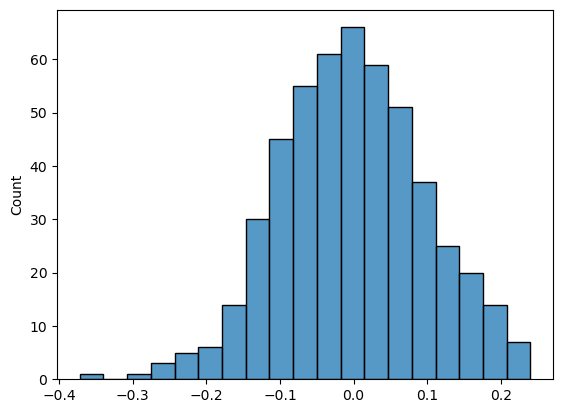

In [6]:
sns.histplot(data)

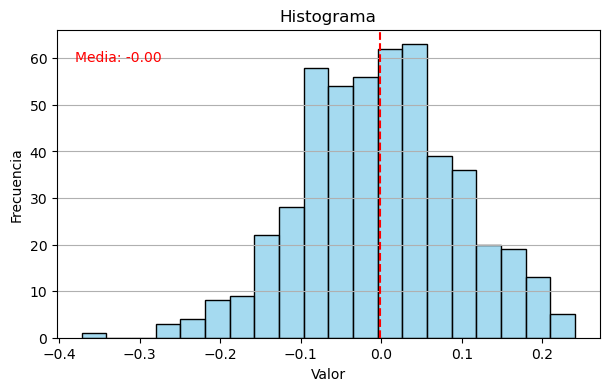

In [7]:
# Incorporo leyendas, ejes, etc.
plt.figure(figsize=(7,4))
sns.histplot(data, bins=20, color="skyblue")
plt.title("Histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.grid(axis = 'y')

media = np.mean(data)
plt.axvline(media, color='red', linestyle='--')
plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        
plt.show()

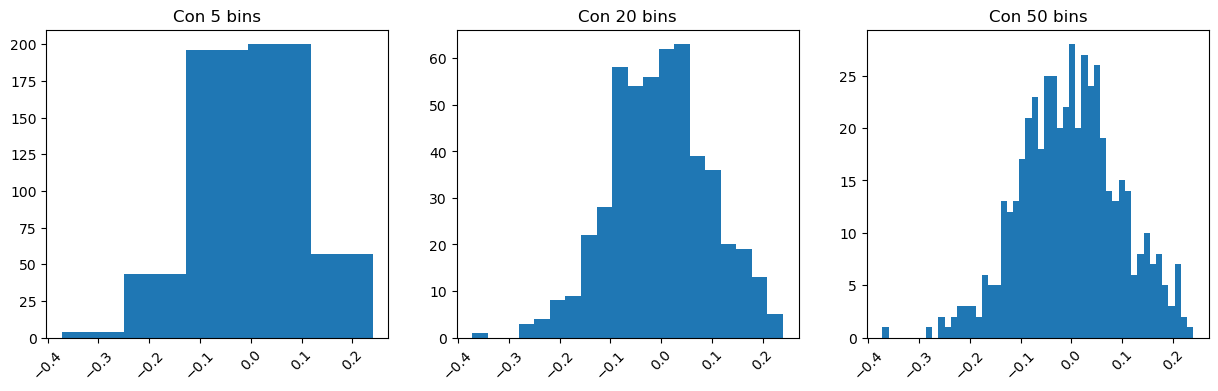

In [8]:
# Experimento con distinta cantidad de bins
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(data, bins=5)
ax[0].set_title('Con 5 bins')
ax[1].hist(data, bins=20)
ax[1].set_title('Con 20 bins')
ax[2].hist(data, bins=50)
ax[2].set_title('Con 50 bins')

for i in (0,1,2):
    ax[i].tick_params(axis='x', rotation=45)

plt.show()

### Empirical Cumulative Distribution Function (ECDF)

Muestra la probabilidad de que una variable sea menor o igual que un valor dado.

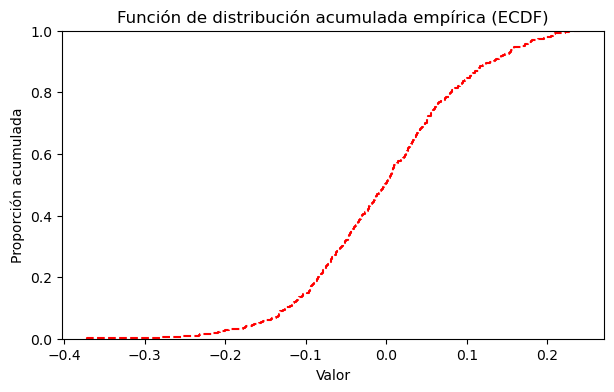

In [9]:
# ECDF
plt.figure(figsize=(7,4))
sns.ecdfplot(data, color="red", ls='--')

plt.title("Función de distribución acumulada empírica (ECDF)")
plt.xlabel("Valor")
plt.ylabel("Proporción acumulada")
plt.show()

### Kernel Density Estimate (KDE)

Es una estimación suavizada de la función de densidad de probabilidad o Probability Density Function (PDF)
a partir de datos muestrales.

Indica qué tan “concentrada” está la probabilidad alrededor de un valor.

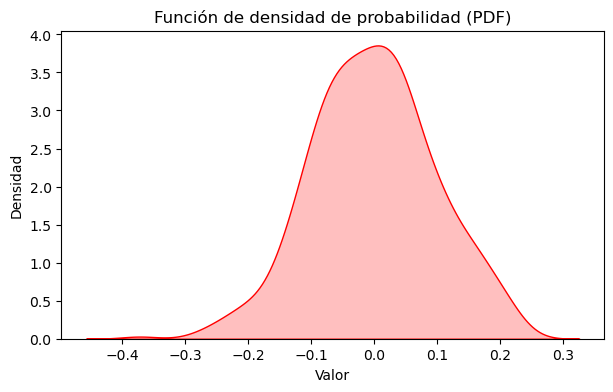

In [10]:
# KDE
plt.figure(figsize=(7,4))
sns.kdeplot(data, fill=True, color="red")
plt.title("Función de densidad de probabilidad (PDF)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show()

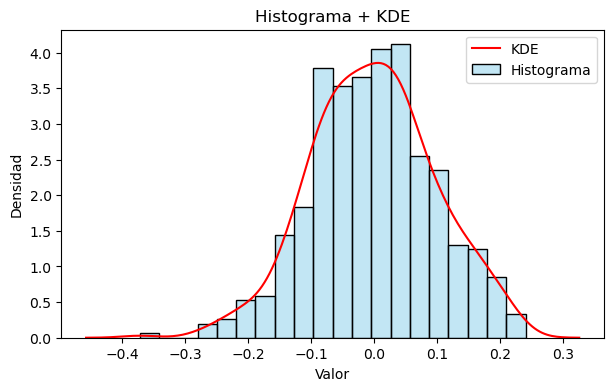

In [11]:
# Histograma + KDE
plt.figure(figsize=(7,4))

# Parámetro stat='density': dibuja una densidad de probabilidad. (El área bajo el histograma da 1)
sns.histplot(data, bins=20, stat="density", color="skyblue", alpha=0.5, label="Histograma")
sns.kdeplot(data, color="red", label="KDE")

plt.title("Histograma + KDE")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## Densidades conjuntas y marginales

#### Datos

In [12]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


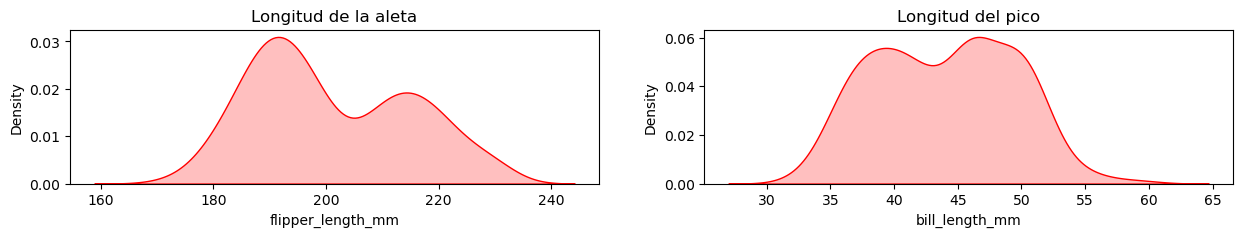

In [13]:
# Usamos dos variables: la longitud de aleta y la longitud de pico
x = penguins["flipper_length_mm"]
y = penguins["bill_length_mm"]

fig, ax = plt.subplots(1, 2, figsize=(15, 2))

sns.kdeplot(x, fill=True, color="red", ax=ax[0])
ax[0].set_title('Longitud de la aleta')

sns.kdeplot(y, fill=True, color="red", ax=ax[1])
ax[1].set_title('Longitud del pico')

plt.show()

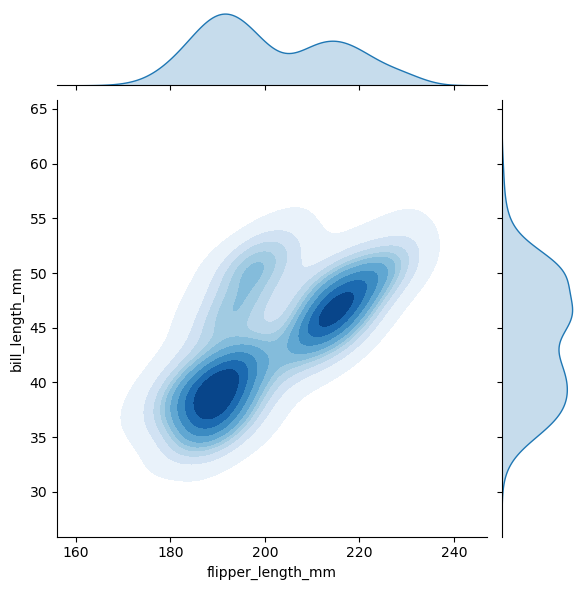

In [14]:
# Jointplot con KDE
# El mapa azul muestra la densidad conjunta.
#Las curvas arriba y a la derecha son las densidades marginales.

sns.jointplot(x=x, y=y, kind="kde", fill=True, cmap="Blues")
plt.show()